In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('DTI_with_group.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()
df

,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,AD_CST_R,AD_CST_L,AD_ML_R,AD_ML_L,...,RD_FXST,RD_SLF,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,Research Group
0,0.001177,0.000974,0.001479,0.001474,0.001575,0.002257,0.001079,0.001081,0.001285,0.001287,...,0.000662,0.000577,0.000551,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,CN
2,0.001213,0.001075,0.001567,0.001585,0.001686,0.002492,0.001046,0.001056,0.001149,0.001126,...,0.000769,0.000694,0.000902,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,CN
3,0.001101,0.000965,0.001440,0.001433,0.001456,0.002379,0.000985,0.000990,0.001118,0.001113,...,0.000614,0.000546,0.000562,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,CN
4,0.001053,0.000904,0.001433,0.001470,0.001450,0.002421,0.000966,0.000977,0.001047,0.001041,...,0.000607,0.000535,0.000551,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,CN
5,0.001131,0.000974,0.001469,0.001498,0.001531,0.002291,0.000994,0.001017,0.001128,0.001105,...,0.000621,0.000559,0.000586,0.000558,0.000901,0.000458,0.000527,0.000605,0.000545,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.001117,0.001011,0.001574,0.001646,0.001712,0.002214,0.001094,0.001118,0.001228,0.001248,...,0.000734,0.000647,0.000913,0.000599,0.001623,0.000538,0.000680,0.000744,0.000652,AD
964,0.001181,0.001002,0.001423,0.001505,0.001530,0.002266,0.001088,0.001103,0.001224,0.001203,...,0.000584,0.000593,0.000624,0.000619,0.000878,0.000487,0.000567,0.000618,0.000571,CN
965,0.001126,0.000949,0.001542,0.001747,0.001642,0.002565,0.000978,0.001052,0.001162,0.001190,...,0.000577,0.000589,0.000835,0.000534,0.001478,0.000440,0.000694,0.000659,0.000597,AD
966,0.001090,0.000976,0.001354,0.001421,0.001427,0.001928,0.001018,0.001007,0.001241,0.001188,...,0.000560,0.000517,0.000514,0.000566,0.000729,0.000441,0.000469,0.000534,0.000509,CN


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [3]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [4]:
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
model.score(X_train, y_train)

0.6528

In [5]:
model.score(X_test, y_test)

0.5162337662337663

In [6]:
confusion_matrix(y_test, y_pred)

array([[  0,   5,   0,   0,   5,   0],
       [  1, 142,   8,   1,  12,   2],
       [  1,  23,   3,   1,   7,   0],
       [  1,  10,   1,   0,   1,   0],
       [  2,  48,   3,   1,  10,   0],
       [  0,  16,   0,   0,   0,   4]])

NameError: name 'font_size' is not defined

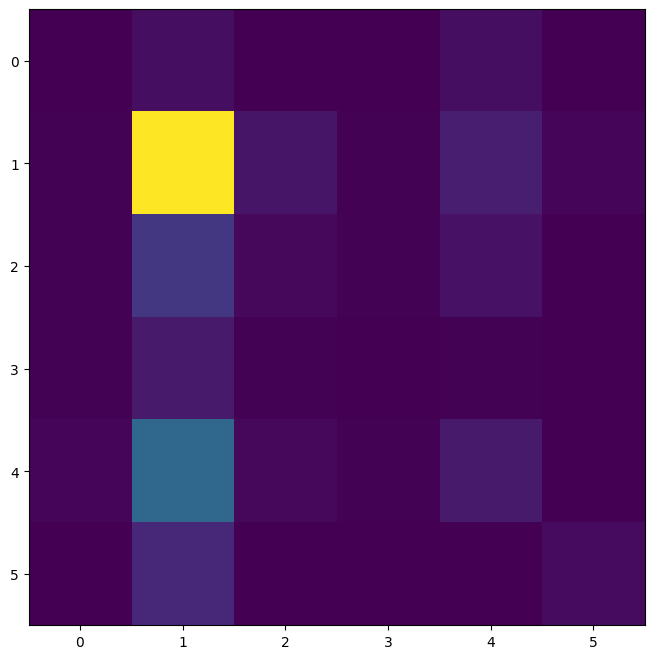

In [7]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AD       0.00      0.00      0.00        10
          CN       0.58      0.86      0.69       166
        EMCI       0.20      0.09      0.12        35
        LMCI       0.00      0.00      0.00        13
         MCI       0.29      0.16      0.20        64
         SMC       0.67      0.20      0.31        20

    accuracy                           0.52       308
   macro avg       0.29      0.22      0.22       308
weighted avg       0.44      0.52      0.45       308



### Combined MCI groups

In [9]:
df = pd.read_csv('DTI_with_group_comb.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()

In [10]:
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=19)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [11]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [12]:
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
model.score(X_train, y_train)

0.728

In [13]:
model.score(X_test, y_test)

0.6071428571428571

NameError: name 'font_size' is not defined

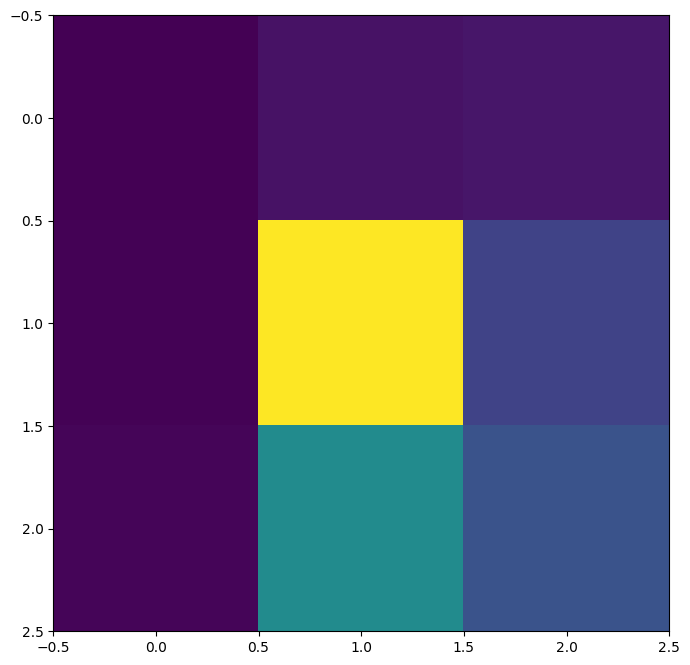

In [14]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AD       0.00      0.00      0.00        16
          CN       0.65      0.83      0.73       180
         MCI       0.49      0.34      0.40       112

    accuracy                           0.61       308
   macro avg       0.38      0.39      0.38       308
weighted avg       0.56      0.61      0.57       308

